# Fake News Detection

!pip install wordcloud

### Importing Necessary Libraries

In [1]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For natural language processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# Other utility libraries
import re
import string

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Loading our dataset
df_fake_news = pd.read_csv("Fake.csv")
df_true_news = pd.read_csv("True.csv")

In [3]:
# Displaying our fake news
df_fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
# Basic info in our fake news
df_fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [5]:
# Displaying our true news
df_true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
df_true_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [7]:
# Adding a target column to datasets 

# 0 will represent our fake news and 1 will represent true news

df_fake_news["class"] = 0
df_true_news["class"] = 1

In [8]:
# checking the dimension of our fakenews dataset
df_fake_news.shape

(23481, 5)

In [9]:
# checking the dimension of our true news dataset
df_true_news.shape

(21417, 5)

In [10]:
import pandas as pd
from datetime import datetime

# Convert the 'date' column to strings and then to datetime format with the correct format
df_fake_news['date'] = pd.to_datetime(df_fake_news['date'].astype(str), errors='coerce', format='%B %d, %Y')

# Identify rows with the format '19-Feb-18'
mask = df_fake_news['date'].isnull() & df_fake_news['date'].astype(str).str.contains('\d{2}-[a-zA-Z]{3}-\d{2}')

# Remove rows with the format '19-Feb-18'
df_fake_news = df_fake_news[~mask]

# Display the updated DataFrame
print(df_fake_news['date'])

0       2017-12-31
1       2017-12-31
2       2017-12-30
3       2017-12-29
4       2017-12-25
           ...    
23476   2016-01-16
23477   2016-01-16
23478   2016-01-15
23479   2016-01-14
23480   2016-01-12
Name: date, Length: 23481, dtype: datetime64[ns]


In [11]:
# Rechecking our info
df_fake_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    23481 non-null  object        
 1   text     23481 non-null  object        
 2   subject  23481 non-null  object        
 3   date     11868 non-null  datetime64[ns]
 4   class    23481 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.1+ MB


In [12]:
import pandas as pd

# Convert the 'date' column to datetime format with the correct format
df_true_news['date'] = pd.to_datetime(df_true_news['date'], errors='coerce')

# Display the DataFrame with potential NaT values
print(df_true_news['date'])


0       2017-12-31
1       2017-12-29
2       2017-12-31
3       2017-12-30
4       2017-12-29
           ...    
21412   2017-08-22
21413   2017-08-22
21414   2017-08-22
21415   2017-08-22
21416   2017-08-22
Name: date, Length: 21417, dtype: datetime64[ns]


In [13]:
df_true_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    21417 non-null  object        
 1   text     21417 non-null  object        
 2   subject  21417 non-null  object        
 3   date     21417 non-null  datetime64[ns]
 4   class    21417 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 836.7+ KB


In [14]:
df_true_news.sample(10)

,title,text,subject,date,class
17611,First Turkish military convoy enters Syria's I...,BEIRUT (Reuters) - A first convoy of the milit...,worldnews,2017-10-12,1
20943,"Britain, EU have very different legal stances ...",LONDON (Reuters) - Britain and the European Un...,worldnews,2017-09-05,1
19085,Merkel hangs on to power but bleeds support to...,BERLIN (Reuters) - German Chancellor Angela Me...,worldnews,2017-09-23,1
15345,NATO to send more troops to Afghanistan after ...,BRUSSELS (Reuters) - NATO is set to agree on T...,worldnews,2017-11-07,1
5046,CIA 'mission' on cars shows concern about next...,SAN FRANCISCO (Reuters) - WikiLeaks documents ...,politicsNews,2017-03-09,1
19054,Canada bans its agencies from sharing informat...,"OTTAWA (Reuters) - Canada, which has been accu...",worldnews,2017-09-25,1
1981,Transgender members in U.S. military may serve...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,politicsNews,2017-08-30,1
18893,Russia jails Crimean dissident for speaking ou...,MOSCOW (Reuters) - A court on Wednesday found ...,worldnews,2017-09-27,1
11929,Saudi-led air strikes kill 136 civilians in Ye...,GENEVA (Reuters) - Air strikes by the Saudi-le...,worldnews,2017-12-19,1
9497,Trump changes tune on UK's Cameron: now sees '...,NEW YORK (Reuters) - Donald Trump appeared to ...,politicsNews,2016-05-17,1


In [15]:
# Joining our True and False Dataset Together in a new dataset

df_news = pd.concat([df_fake_news, df_true_news], axis =0 )
df_news.head(10)


,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,2017-12-25,0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,2017-12-23,0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,2017-12-23,0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,2017-12-22,0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,2017-12-21,0


In [16]:
# Checking the dimension of our mergerd 
df_news.shape

(44898, 5)

In [17]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    44898 non-null  object        
 1   text     44898 non-null  object        
 2   subject  44898 non-null  object        
 3   date     33285 non-null  datetime64[ns]
 4   class    44898 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.1+ MB


In [18]:
df_news.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,0


In [19]:

# Display basic info about the dataset
print(df_news.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    44898 non-null  object        
 1   text     44898 non-null  object        
 2   subject  44898 non-null  object        
 3   date     33285 non-null  datetime64[ns]
 4   class    44898 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.1+ MB
None


In [20]:
df_news.describe().T

,count,mean,std,min,25%,50%,75%,max
class,44898.0,0.477015,0.499477,0.0,0.0,0.0,1.0,1.0


In [21]:
df_news.nunique().to_frame('Number of unique value')

,Number of unique value
title,38729
text,38646
subject,8
date,761
class,2


In [22]:
df_news.isnull().sum().to_frame('Number of null value')

,Number of null value
title,0
text,0
subject,0
date,11613
class,0


In [23]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    44898 non-null  object        
 1   text     44898 non-null  object        
 2   subject  44898 non-null  object        
 3   date     33285 non-null  datetime64[ns]
 4   class    44898 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.1+ MB


In [24]:
# Dropping the duplicates in our data
df_news.drop_duplicates()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22,1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22,1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22,1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22,1


In [25]:
# News Subject categorization
df_news['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

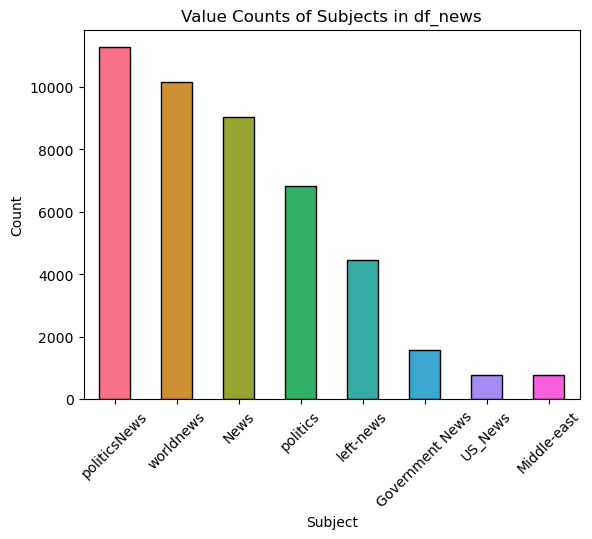

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

value_counts_series = df_news['subject'].value_counts()

# Define a color palette with 8 distinct colors
colors = sns.color_palette('husl', 8)

# Plotting the value counts with custom colors
value_counts_series.plot(kind='bar', rot=45, color=colors, edgecolor='black')

# Adding labels and title
plt.xlabel('Subject')
plt.ylabel('Count')
plt.title('Value Counts of Subjects in df_news')

# Displaying the plot
plt.show()


In [27]:
import pandas as pd

# Create new columns for months and years
df_news['month'] = df_true_news['date'].dt.month
df_news['year'] = df_true_news['date'].dt.year

In [28]:
# Displaying our data
df_news.head()

,title,text,subject,date,class,month,year
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,0,12.0,2017.0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,0,12.0,2017.0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,0,12.0,2017.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,0,12.0,2017.0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,0,12.0,2017.0


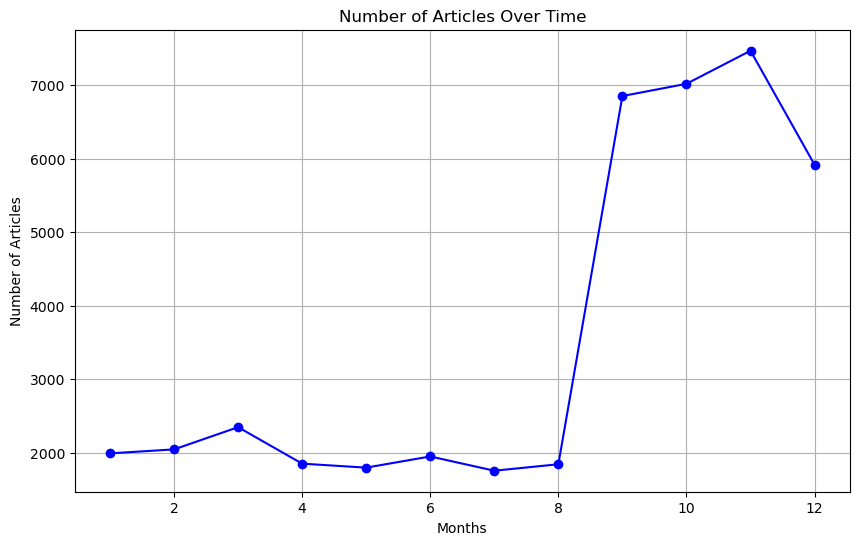

In [29]:
# A Chart on number of Article by Month

import pandas as pd
import matplotlib.pyplot as plt

# Group by date and count the number of articles for each date
articles_per_date = df_news.groupby('month').size()

# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(articles_per_date.index, articles_per_date.values, marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Months')
plt.ylabel('Number of Articles')
plt.title('Number of Articles Over Time')

# Displaying the plot
plt.grid(True)
plt.show()


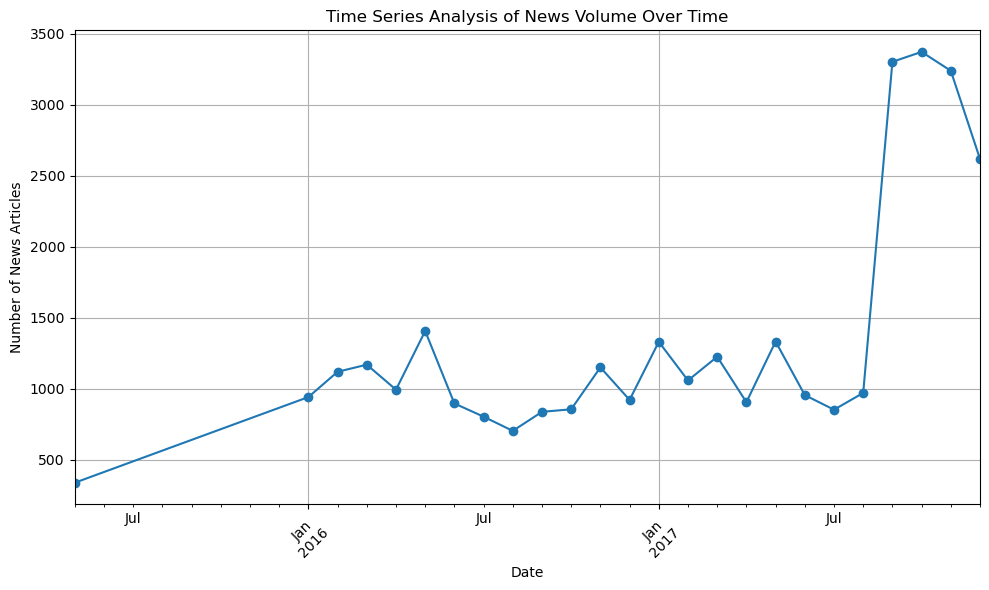

In [30]:
plt.figure(figsize=(10, 6))
df_news.groupby(df_news['date'].dt.to_period('M')).size().plot(marker='o')
plt.title('Time Series Analysis of News Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Number of News Articles')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


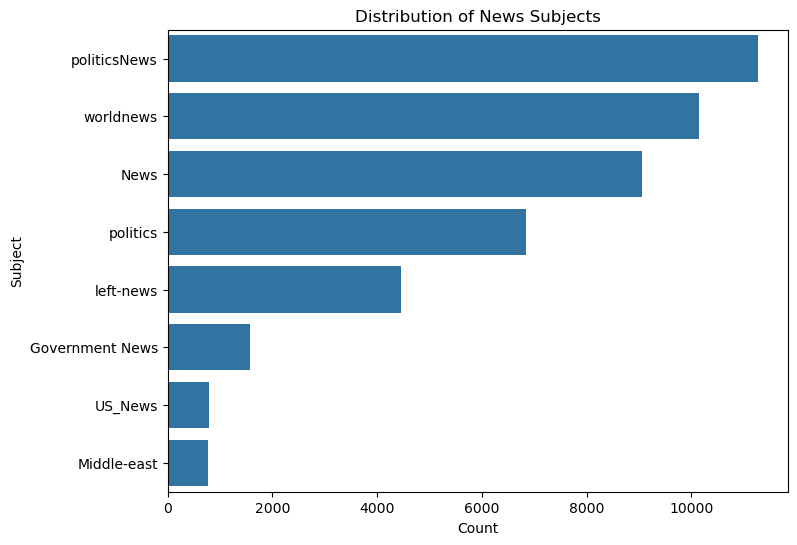

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(y='subject', data=df_news, order=df_news['subject'].value_counts().index)
plt.title('Distribution of News Subjects')
plt.xlabel('Count')
plt.ylabel('Subject')
plt.show()


In [32]:
df_news

,title,text,subject,date,class,month,year
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,0,12.0,2017.0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,0,12.0,2017.0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,0,12.0,2017.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,0,12.0,2017.0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,0,12.0,2017.0
...,...,...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22,1,8.0,2017.0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22,1,8.0,2017.0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22,1,8.0,2017.0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22,1,8.0,2017.0


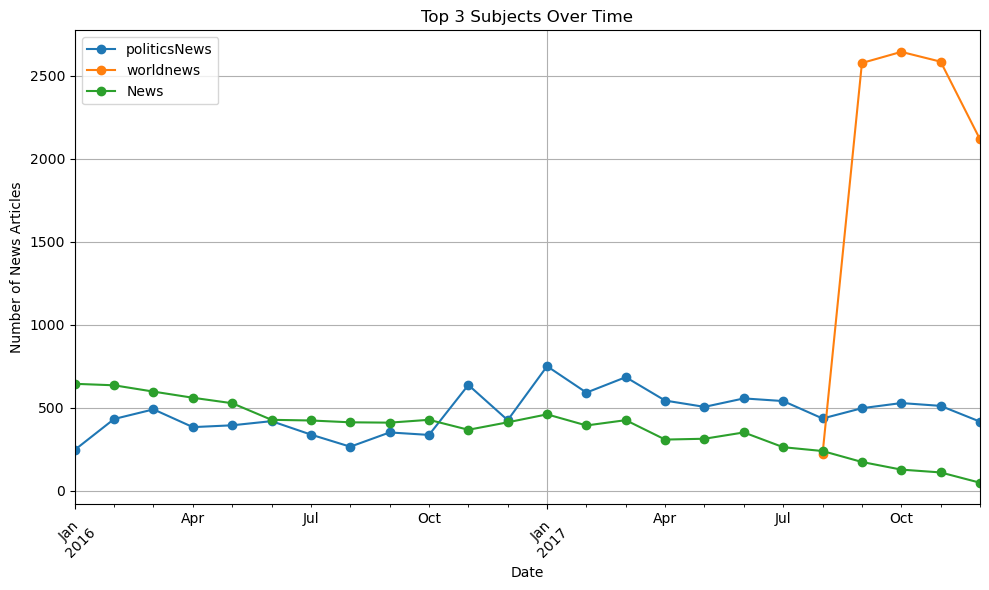

In [33]:
# Top 3 Subjects Over Time
top_n = 3
top_subjects = df_news['subject'].value_counts().head(top_n).index
plt.figure(figsize=(10, 6))
for subject in top_subjects:
    df_sub = df_news[df_news['subject'] == subject]
    df_sub.groupby(df_sub['date'].dt.to_period('M')).size().plot(label=subject, marker='o')
plt.title(f'Top {top_n} Subjects Over Time')
plt.xlabel('Date')
plt.ylabel('Number of News Articles')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

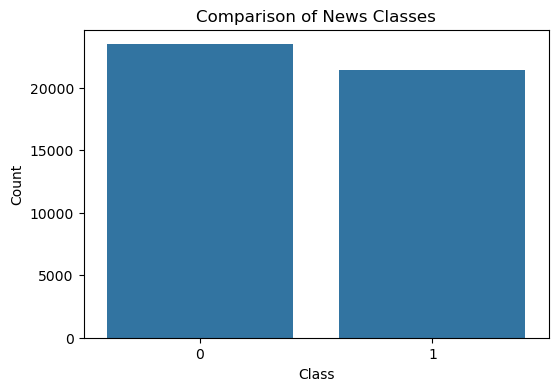

In [34]:
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df_news)
plt.title('Comparison of News Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['0', '1'])
plt.show()

In [35]:
from textblob import TextBlob


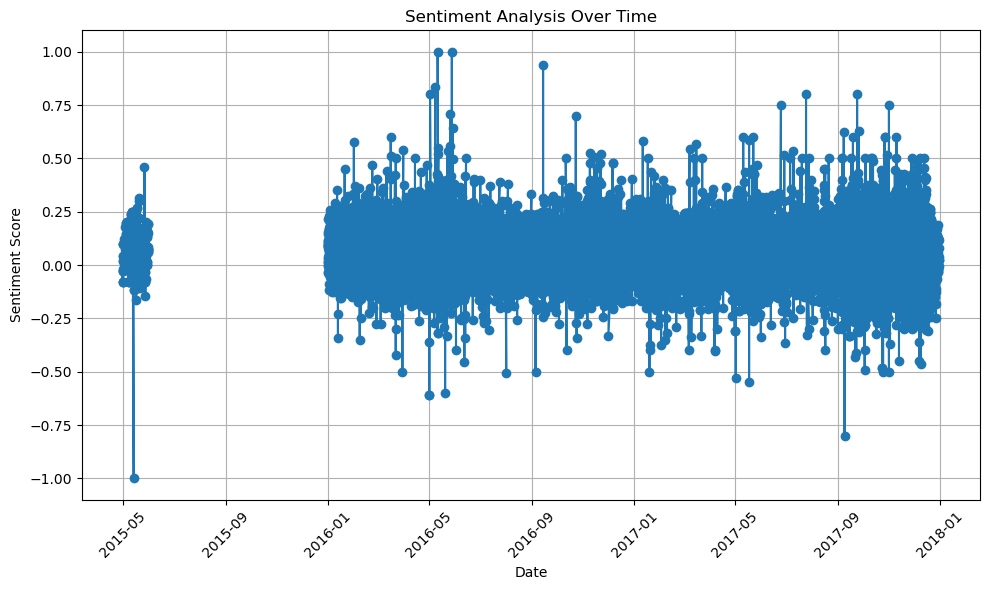

In [36]:

# Perform sentiment analysis on the text
df_news['sentiment_score'] = df_news['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot Sentiment Analysis Over Time
plt.figure(figsize=(10, 6))
plt.plot(df_news['date'], df_news['sentiment_score'], marker='o', linestyle='-')
plt.title('Sentiment Analysis Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

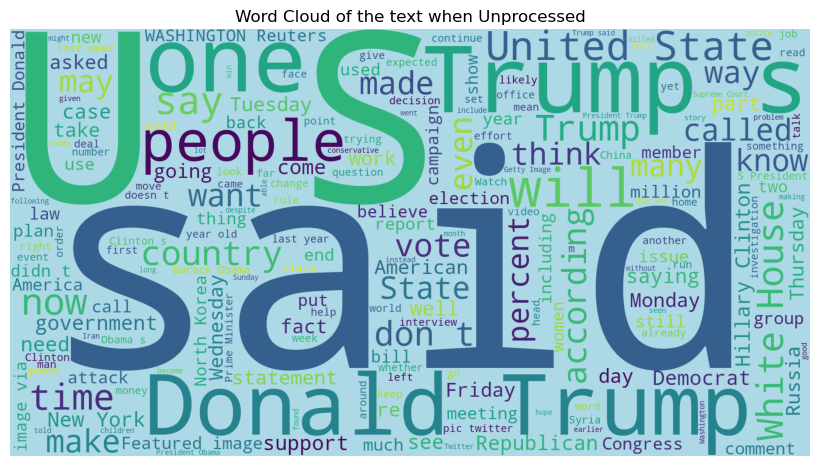

In [37]:
from wordcloud import WordCloud, STOPWORDS


# Word cloud of tweets

# Concatenate all text in the series
text = ' '.join(df_news['text'])

# Create a WordCloud object and generate a word cloud from the text
wordcloud = WordCloud(width=1500, height=800, background_color='lightblue', stopwords=STOPWORDS).generate(text)

# Visualize the word cloud using matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Word Cloud of the text when Unprocessed")

# Show the plot
plt.show()

In [38]:
# For machine learning models
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [39]:
# Clean Datasets
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from collections import Counter

ps = PorterStemmer()
wnl = nltk.stem.WordNetLemmatizer()

stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)


In [40]:
def prepare_data(df, test_size=0.2, include_title=True, include_subject=True):
    texts = []
    labels = []
    for i in range(len(df)):
        text = df["text"].iloc[i]
        label = df["class"].iloc[i]
        if include_title:
          text = df["title"].iloc[i] + " - " + text
        if include_subject:
          text = df["subject"].iloc[i] + " : " + text
        if text and label in [0, 1]:
          texts.append(text)
          labels.append(label)
    return train_test_split(texts, labels, test_size=test_size)

# Splitting the data into train and test sets
train_texts, test_texts, train_labels, test_labels = prepare_data(df_news)


## Stemming:
### Stemming is the process of reducing a word to its Root word

example: actor, actress, acting --> act

In [41]:
port_stem = PorterStemmer()

In [42]:
def stemming(content):
    # Convert content to lowercase
    stemmed_content = content.lower()
    # Tokenize the content
    stemmed_content = stemmed_content.split()
    # Remove stopwords and apply stemming
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if word not in stopwords.words('english')]
    # Join the stemmed words back into a string
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [43]:
df_news['title'] = df_news['title'].apply(stemming)

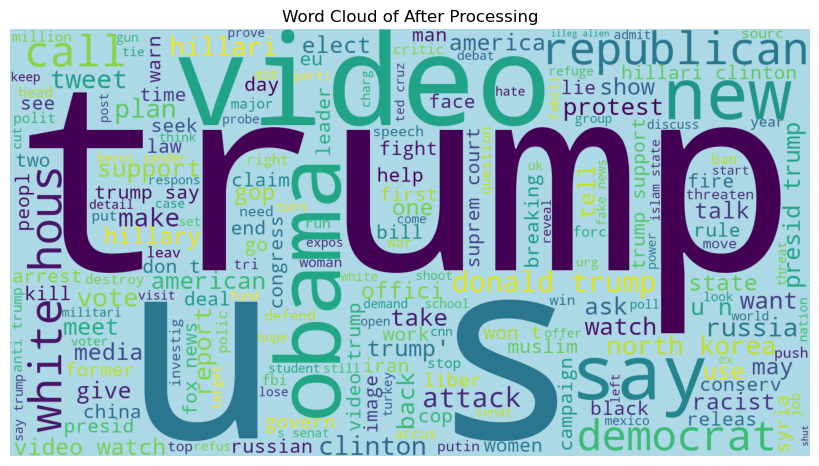

In [44]:
from wordcloud import WordCloud, STOPWORDS

# Concatenate all text in the series
text = ' '.join(df_news['title'])

# Create a WordCloud object and generate a word cloud from the text
wordcloud = WordCloud(width=1500, height=800, background_color='lightblue', stopwords=STOPWORDS).generate(text)

# Visualize the word cloud using matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Word Cloud of After Processing")

# Show the plot
plt.show()

In [45]:
## Shape and colums of train dataset
print(" Shape of News data :: ", df_news.shape)
print(" News data columns", df_news.columns)

 Shape of News data ::  (44898, 8)
 News data columns Index(['title', 'text', 'subject', 'date', 'class', 'month', 'year',
       'sentiment_score'],
      dtype='object')


In [46]:
## by using df.head(),We can immediately familiarize ourselves with the dataset. 
df_news.head()

,title,text,subject,date,class,month,year,sentiment_score
0,donald trump send embarrass new year’ eve mess...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,0,12.0,2017.0,0.082132
1,drunk brag trump staffer start russian collus ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,0,12.0,2017.0,-0.005004
2,sheriff david clark becom internet joke threat...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,0,12.0,2017.0,-0.012345
3,trump obsess even obama’ name code websit (ima...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,0,12.0,2017.0,-0.023118
4,pope franci call donald trump christma speech,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,0,12.0,2017.0,-0.011722


In [47]:
#Text Word startistics: min.mean, max and interquartile range
txt_length = df_news.text.str.split().str.len()
txt_length.describe()

count    44898.000000
mean       405.282284
std        351.265595
min          0.000000
25%        203.000000
50%        362.000000
75%        513.000000
max       8135.000000
Name: text, dtype: float64

In [48]:
#Title statistics 

title_length = df_news.title.str.split().str.len()
title_length.describe()

count    44898.000000
mean         9.560626
std          2.846706
min          1.000000
25%          8.000000
50%          9.000000
75%         11.000000
max         30.000000
Name: title, dtype: float64

1: Unreliable
0: Reliable
Distribution of labels:
0    23481
1    21417
Name: class, dtype: int64


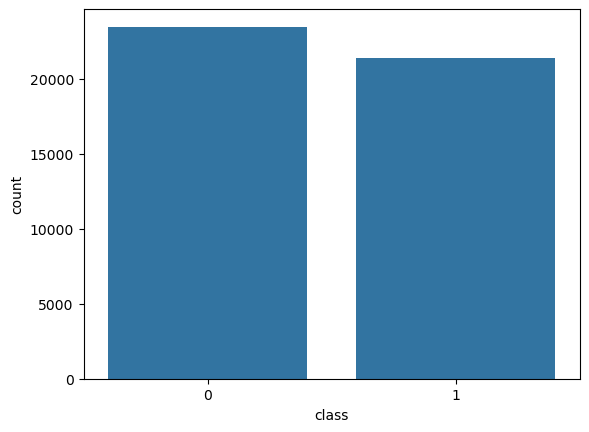

In [49]:
sns.countplot(x="class", data=df_news);
print("1: Unreliable")
print("0: Reliable")
print("Distribution of labels:")
print(df_news['class'].value_counts())


In [50]:
df_news.columns

Index(['title', 'text', 'subject', 'date', 'class', 'month', 'year',
       'sentiment_score'],
      dtype='object')

In [51]:
column_n = [ 'title', 'subject', 'text', 'class']
remove_c = ['date']
categorical_features = ['month', 'year']
target_col = ['class']
text_f = ['title', 'text']

In [52]:

# Removed unused clumns
def remove_unused_c(df,column_n=remove_c):
    df = df.drop(column_n,axis=1)
    return df

# Impute null values with None
def null_process(feature_df):
    for col in text_f:
        feature_df.loc[feature_df[col].isnull(), col] = "None"
    return feature_df

def clean_dataset(df):
    # remove unused column
    df = remove_unused_c(df)
    #impute null values
    df = null_process(df)
    return df

# Cleaning text from unused characters
def clean_text(text):
    text = str(text).replace(r'http[\w:/\.]+', ' ')  # removing urls
    text = str(text).replace(r'[^\.\w\s]', ' ')  # remove everything but characters and punctuation
    text = str(text).replace('[^a-zA-Z]', ' ')
    text = str(text).replace(r'\s\s+', ' ')
    text = text.lower().strip()
    #text = ' '.join(text)    
    return text

## Nltk Preprocessing include:
# Stop words, Stemming and Lemmetization
# For our project we use only Stop word removal
def nltk_preprocess(text):
    text = clean_text(text)
    wordlist = re.sub(r'[^\w\s]', '', text).split()
    #text = ' '.join([word for word in wordlist if word not in stopwords_dict])
    #text = [ps.stem(word) for word in wordlist if not word in stopwords_dict]
    text = ' '.join([wnl.lemmatize(word) for word in wordlist if word not in stopwords_dict])
    return  text

In [53]:
# Perform data cleaning on train and test dataset by calling clean_dataset function
df = clean_dataset(df_news)

In [54]:

# apply preprocessing on text through apply method by calling the function nltk_preprocess
df["text"] = df.text.apply(nltk_preprocess)

In [55]:

# apply preprocessing on title through apply method by calling the function nltk_preprocess
df["title"] = df.title.apply(nltk_preprocess)

In [56]:
# Dataset after cleaning and preprocessing step
df.head()

,title,text,subject,class,month,year,sentiment_score
0,donald trump send embarrass new year eve messa...,donald trump wish american happy new year leav...,News,0,12.0,2017.0,0.082132
1,drunk brag trump staffer start russian collus ...,house intelligence committee chairman devin nu...,News,0,12.0,2017.0,-0.005004
2,sheriff david clark becom internet joke threat...,friday revealed former milwaukee sheriff david...,News,0,12.0,2017.0,-0.012345
3,trump ob even obama name code websit image,christmas day donald trump announced would bac...,News,0,12.0,2017.0,-0.023118
4,pope franci call donald trump christma speech,pope francis used annual christmas day message...,News,0,12.0,2017.0,-0.011722


In [57]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


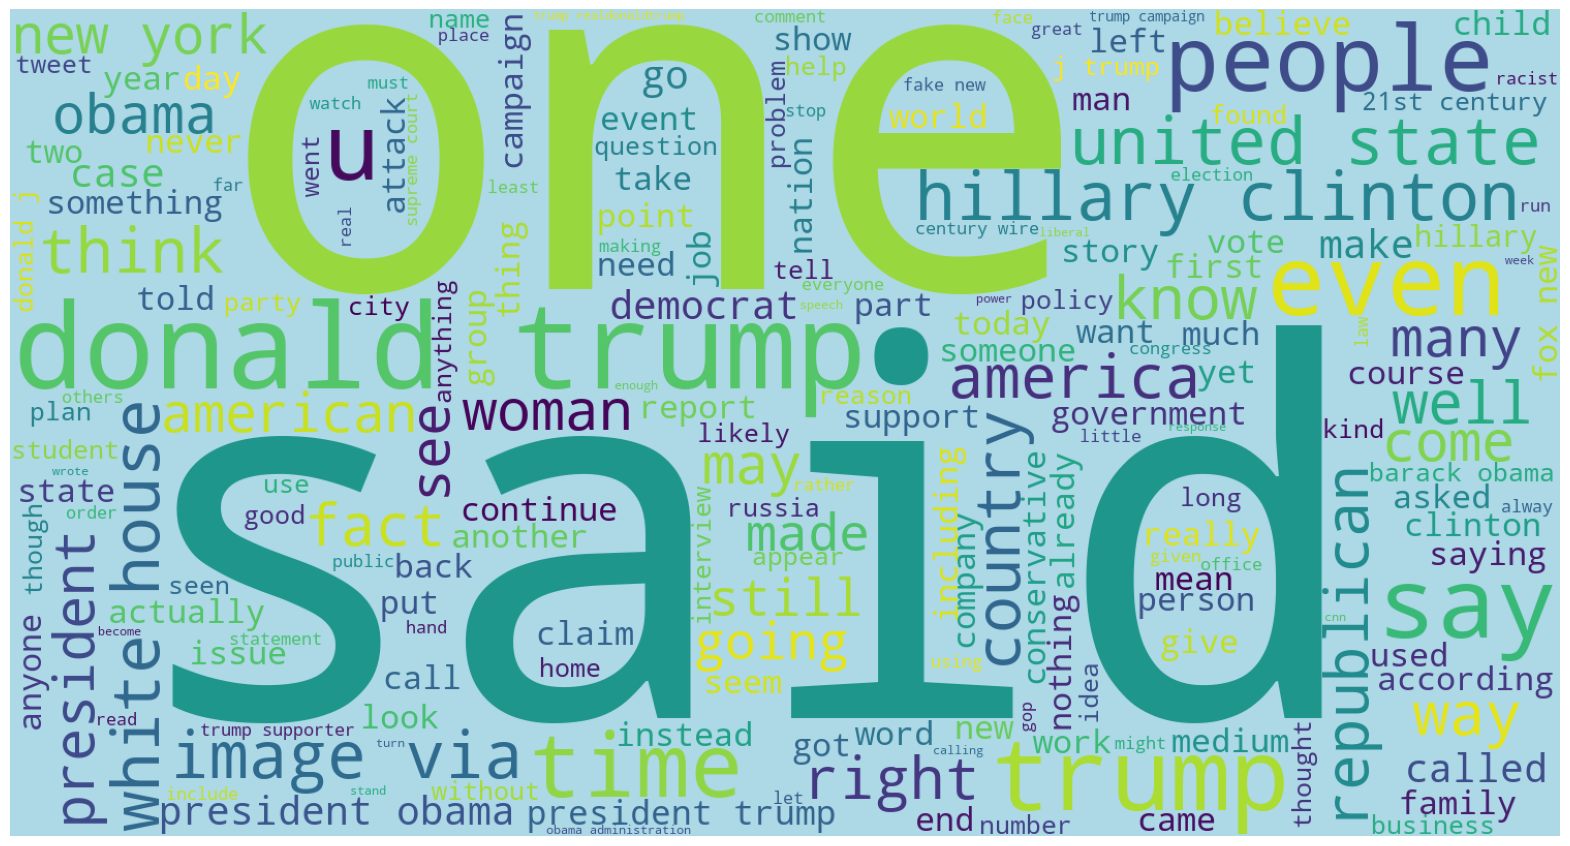

In [58]:
true_n = ' '.join(df[df['class']==0]['text']) 
wc = wordcloud.generate(true_n)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

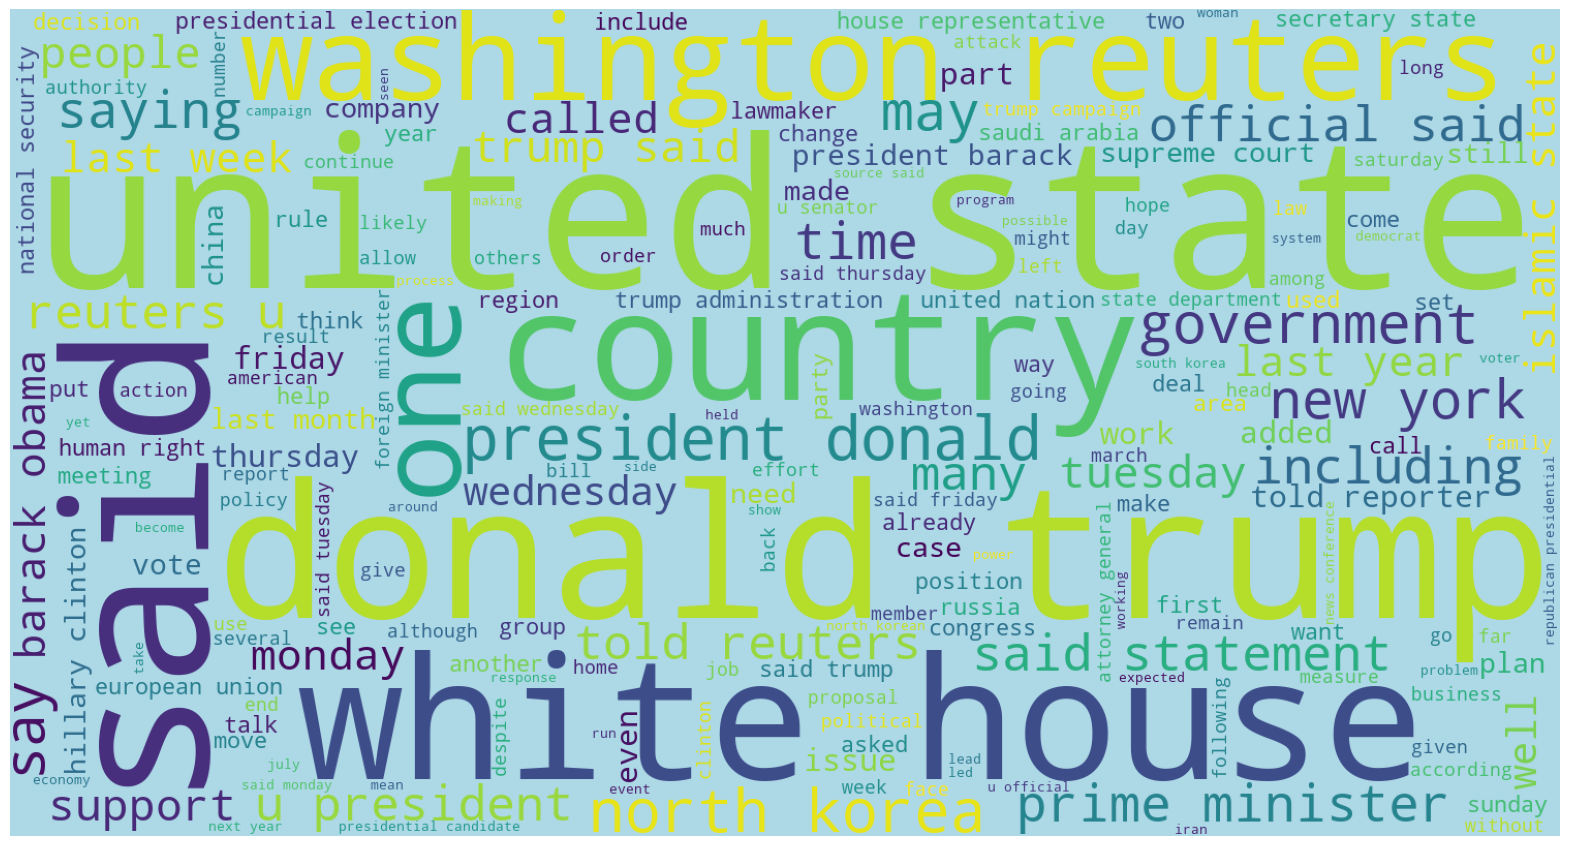

In [59]:
fake_n = ' '.join(df[df['class']==1]['text'])
wc= wordcloud.generate(fake_n)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [60]:
def plot_top_ngrams(corpus, title, ylabel, xlabel="Number of Occurences", n=2):
  """Utility function to plot top n-grams"""
  true_b = (pd.Series(nltk.ngrams(corpus.split(), n)).value_counts())[:20]
  true_b.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
  plt.title(title)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.show()

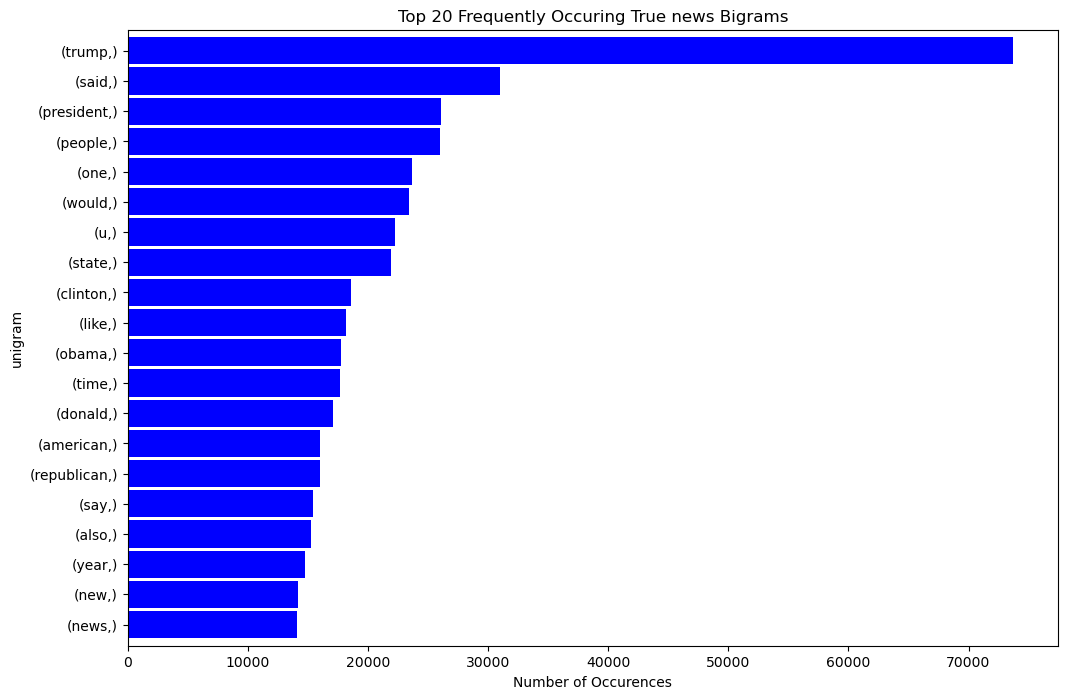

In [70]:
plot_top_ngrams(true_n, 'Top 20 Frequently Occuring True news Bigrams', "unigram", n=1)

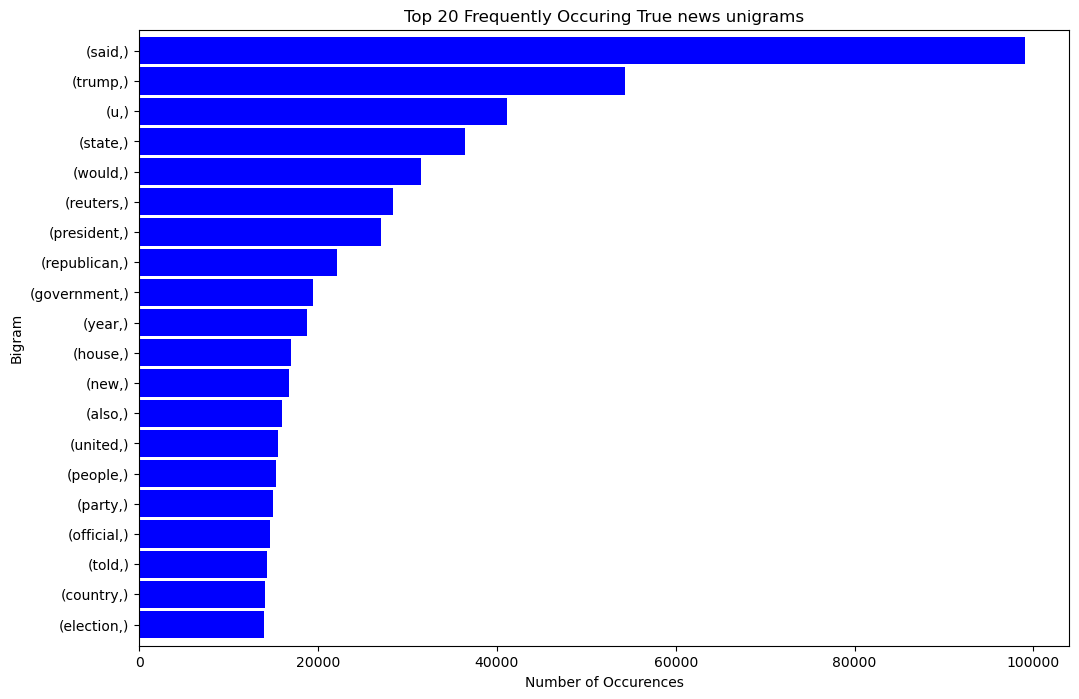

In [71]:
plot_top_ngrams(fake_n, 'Top 20 Frequently Occuring True news unigrams', "Bigram", n=1)

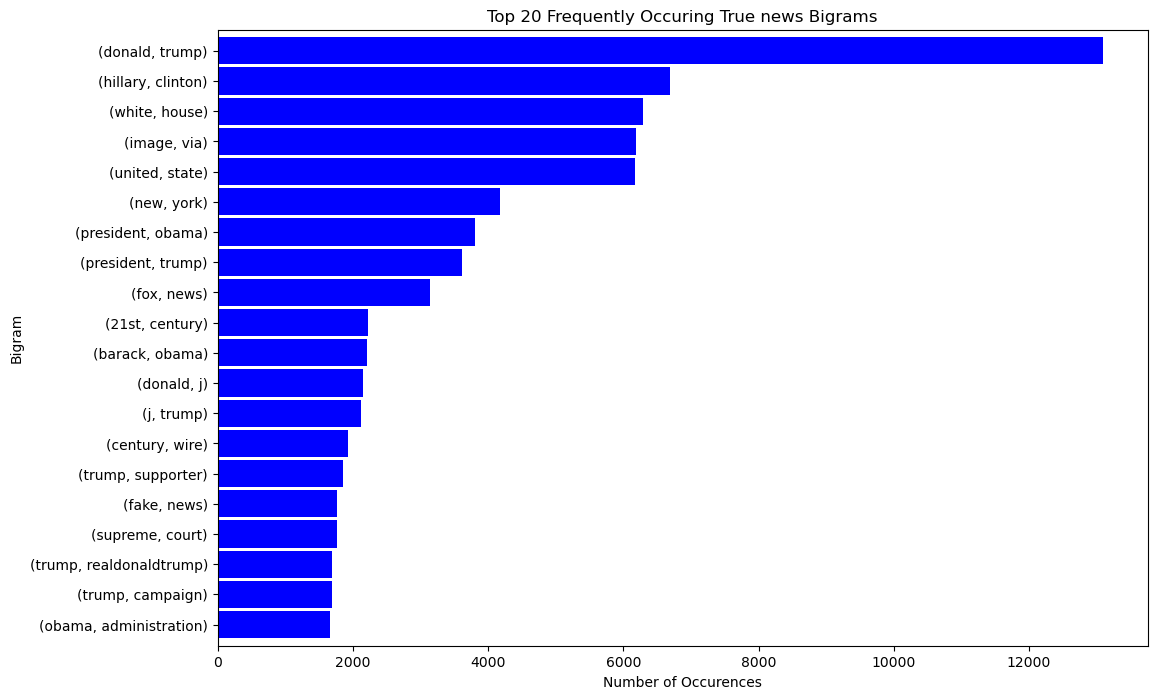

In [76]:
plot_top_ngrams(true_n, 'Top 20 Frequently Occuring True news Bigrams', "Bigram", n=2)

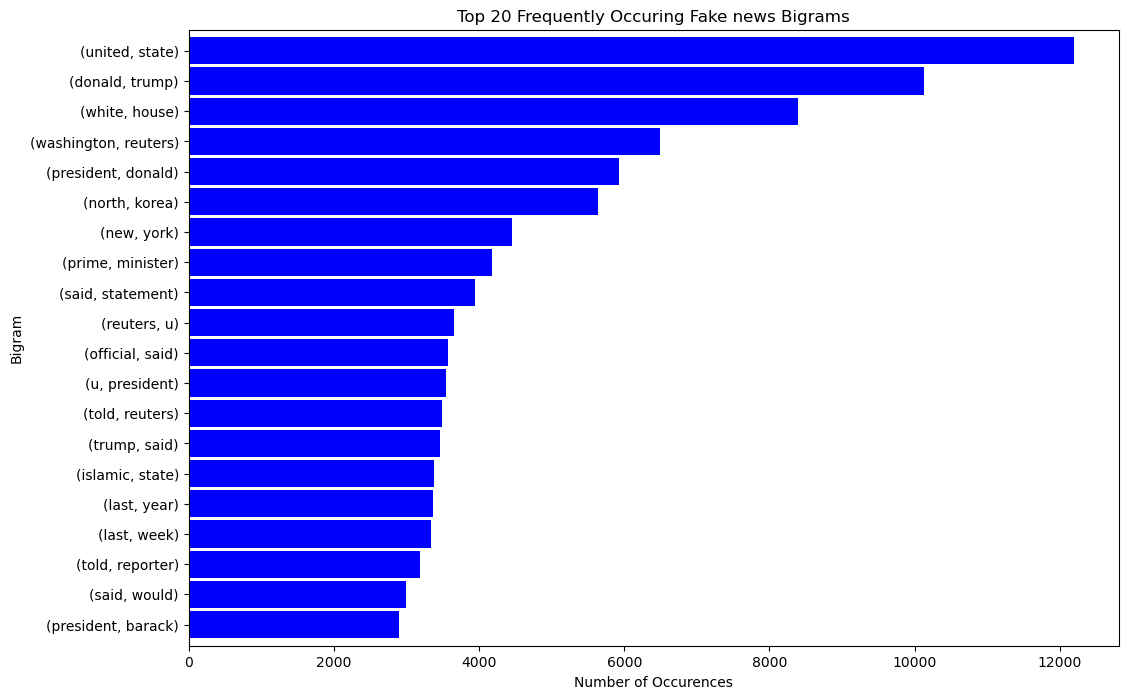

In [73]:
plot_top_ngrams(fake_n, 'Top 20 Frequently Occuring Fake news Bigrams', "Bigram", n=2)

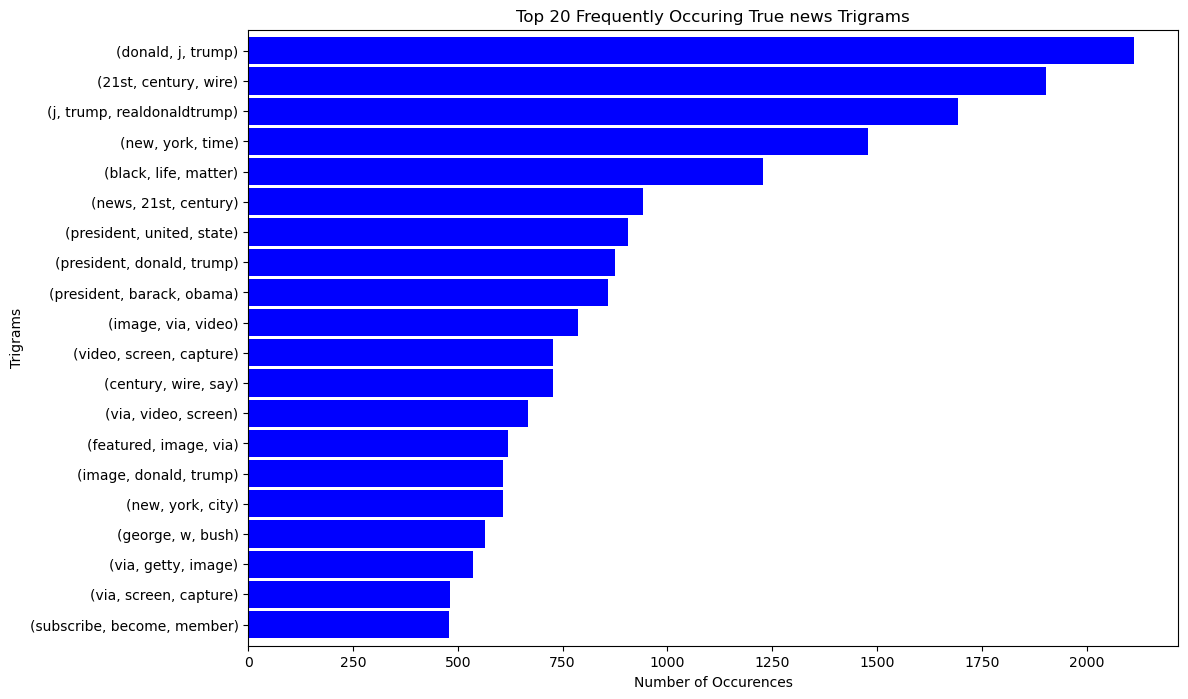

In [74]:
plot_top_ngrams(true_n, 'Top 20 Frequently Occuring True news Trigrams', "Trigrams", n=3)

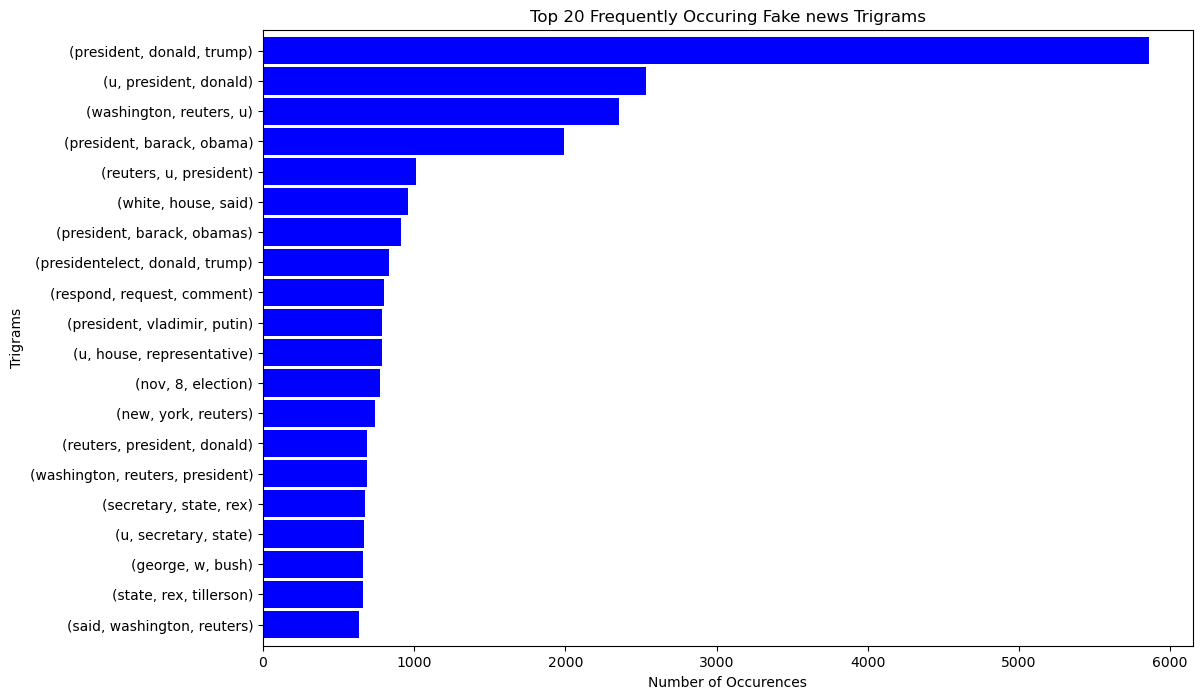

In [75]:
plot_top_ngrams(fake_n, 'Top 20 Frequently Occuring Fake news Trigrams', "Trigrams", n=3)

In [65]:
df = df[df['text'].notna()]
df = df[df["subject"].notna()] 
df = df[df["title"].notna()]

In [34]:

# Define functions for cleaning and preprocessing
def clean_text(text):
    text = str(text).replace(r'http[\w:/\.]+', ' ')  # removing urls
    text = str(text).replace(r'[^\.\w\s]', ' ')  # remove everything but characters and punctuation
    text = str(text).replace('[^a-zA-Z]', ' ')
    text = str(text).replace(r'\s\s+', ' ')
    text = text.lower().strip()
    return text

def nltk_preprocess(text):
    text = clean_text(text)
    wordlist = re.sub(r'[^\w\s]', '', text).split()
    text = ' '.join([wnl.lemmatize(word) for word in wordlist if word not in stopwords_dict])
    return  text


In [35]:
# Clean and preprocess train data
train_texts_cleaned = [nltk_preprocess(text) for text in train_texts]

# Clean and preprocess test data
test_texts_cleaned = [nltk_preprocess(text) for text in test_texts]

# Display a sample of the cleaned train data
print("Sample of cleaned train data:")
for i in range(5):
    print(train_texts_cleaned[i])

# Display a sample of the cleaned test data
print("\nSample of cleaned test data:")
for i in range(5):
    print(test_texts_cleaned[i])


Sample of cleaned train data:
news watch gabrielle union strongly call trump kellyanne conway bullsht actress gabrielle union hold back lady view asked comment donald trump attack meryl streepjoy behar wanted hear union thought streep speech golden globe called know attacking peopleunion hold back talked someone openly mocked disabled reporter somebody openly mocked disabled reporter panty bunch began somebody panty bunch openly mocked disabled reporter captured video pander hate talked union went say streep attack trump simply shined light terrible behavior called accountable action indeed streep never mentioned trump name merely called divisive petty behavior yet trump accused streep attacking lied mocking new york time reporter serge kovaleski twittermeryl streep one overrated actress hollywood know attacked last night golden globe donald j trump realdonaldtrump january 9 2017hillary flunky lost big 100th time never mocked disabled reporter would never simply showed donald j trump r

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=100)  

# Fit and transform on the training data
train_tfidf_matrix = tfidf_vectorizer.fit_transform(train_texts_cleaned)

# Transform the testing data
test_tfidf_matrix = tfidf_vectorizer.transform(test_texts_cleaned)

# Display the shape of the resulting TF-IDF matrices
print("TF-IDF Matrix - Training:", train_tfidf_matrix.shape)
print("TF-IDF Matrix - Testing:", test_tfidf_matrix.shape)

TF-IDF Matrix - Training: (35918, 100)
TF-IDF Matrix - Testing: (8980, 100)


In [37]:
train_tfidf_matrix

<35918x100 sparse matrix of type '<class 'numpy.float64'>'
	with 872692 stored elements in Compressed Sparse Row format>

In [38]:
import joblib

# Save TF-IDF Vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [39]:

# Initialize Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(train_tfidf_matrix, train_labels)

# Predict on the test data
predictions = nb_classifier.predict(test_tfidf_matrix)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(test_labels, predictions))



Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      4762
           1       0.90      0.94      0.92      4218

    accuracy                           0.92      8980
   macro avg       0.92      0.92      0.92      8980
weighted avg       0.92      0.92      0.92      8980



In [40]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, classification_report

In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import joblib

In [46]:
# A function for Our metrics 
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    f1_scorre = f1_score(true, predicted, average= 'macro')
    confusion_matrixx = confusion_matrix(true, predicted)
    precision = precision_score(true, predicted, average= 'macro')
    classification = classification_report(true, predicted)
    return accuracy, f1_scorre, confusion_matrixx, precision, classification

In [47]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_jobs=-1),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "SVM": SVC(),
    "NuSVC": NuSVC(),
    "KNN": KNeighborsClassifier(),
    "MultinomialNB": MultinomialNB()
}

#An empty list to save our models
model_list = []


# An empty list to save our evaluation metrics
accuracy_list =[]
f1_score_list =[]
precision_list =[]


# A loop to go through all our models and give a simple result on them

for i in range(len(list(models))):
    model = list(models.values())[i]
    
    count = model
    
    count.fit(train_tfidf_matrix, train_labels) # test model

    # Make predictions
    y_test_pred = count.predict(test_tfidf_matrix)
    y_train_pred = count.predict(train_tfidf_matrix)
    
    # Evaluate test and Test dataset
    model_test_accuracy , model_test_f1_score, model_test_confusion_matrix, model_test_precision, model_test_classification = evaluate_model(test_labels, y_test_pred)

    model_train_accuracy , model_train_f1_score, model_train_confusion_matrix, model_train_precision, model_train_classification = evaluate_model(train_labels, y_train_pred)
    model_filename = f'best_{model}_model.pkl'
    joblib.dump(model, model_filename)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Model Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Model F1-Score: {:.4f}".format(model_train_f1_score))
    print("- Model Confusion Matrix:")
    print(model_train_confusion_matrix)
    print("- Model Precision: {:.4f}".format(model_train_precision))
    print("- Model Classification Report:")
    print(model_train_classification)

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Model Accuracy: {:.4f}".format(model_test_accuracy))
    print("- Model F1-Score: {:.4f}".format(model_test_f1_score))
    print("- Model Confusion Matrix:")
    print(model_test_confusion_matrix)
    print("- Model Precision: {:.4f}".format(model_test_precision))
    print("- Model Classification Report:")
    print(model_test_classification)    
    
    accuracy_list.append(model_test_accuracy)
    f1_score_list.append(model_test_f1_score)
    precision_list.append(model_test_precision)

    
    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Model Accuracy: 0.9831
- Model F1-Score: 0.9831
- Model Confusion Matrix:
[[18376   343]
 [  263 16936]]
- Model Precision: 0.9830
- Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     18719
           1       0.98      0.98      0.98     17199

    accuracy                           0.98     35918
   macro avg       0.98      0.98      0.98     35918
weighted avg       0.98      0.98      0.98     35918

----------------------------------
Model performance for Test set
- Model Accuracy: 0.9851
- Model F1-Score: 0.9850
- Model Confusion Matrix:
[[4690   72]
 [  62 4156]]
- Model Precision: 0.9850
- Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4762
           1       0.98      0.99      0.98      4218

    accuracy                           0.99      8980
   macro a

OSError: [Errno 22] Invalid argument: 'best_<catboost.core.CatBoostClassifier object at 0x00000234BF740AD0>_model.pkl'

In [51]:
pd.DataFrame(list(zip(model_list, accuracy_list, precision_list, f1_score_list)), 
             columns=['Model Name', 'Accuracy', 'precision', 'f1_score']).sort_values(by=["Accuracy"],ascending=False)

,Model Name,Accuracy,precision,f1_score
2,Random Forest,0.997327,0.997278,0.997318
3,AdaBoostClassifier,0.994766,0.994677,0.994748
1,Decision Tree,0.994543,0.994628,0.994522
4,SVM,0.993430,0.993336,0.993407
0,Logistic Regression,0.985078,0.984962,0.985025
5,NuSVC,0.952561,0.952056,0.952451
7,MultinomialNB,0.921492,0.921203,0.921391
6,KNN,0.908909,0.910617,0.908896


In [105]:
import joblib

def test_model_with_sample_data(sample_data, model_path="best_DecisionTreeClassifier()_model.pkl", vectorizer_path='tfidf_vectorizer.pkl'):
    # Load the TF-IDF vectorizer
    tfidf_vectorizer = joblib.load(vectorizer_path)
    
    # Load the trained model
    model = joblib.load(model_path)
    
    # Clean and preprocess the sample data
    cleaned_sample_data = [nltk_preprocess(text) for text in sample_data]
    
    # Transform the sample data using the loaded vectorizer
    sample_tfidf_matrix = tfidf_vectorizer.transform(cleaned_sample_data)
    
    # Make predictions
    predictions = model.predict(sample_tfidf_matrix)
    
    return predictions

# Example usage
sample_data = [
    "Breaking: Scientists discover new planet orbiting distant star.",
    "Trump administration announces new trade tariffs on Chinese goods.",
    "Health experts warn about the spread of a new contagious disease.",
    "Local community celebrates opening of new park.",
    "GADSDEN, Ala. (Reuters) - In a U.S. Senate race rocked by allegations of sexual misconduct against Republican candidate Roy Moore, some women in his hometown said they were sticking by the embattled nominee while others said prayer would guide their votes on Tuesday. Caroll Norman, a retired middle school teacher in Gadsden, said she did not know if she would vote for a Democrat for the first time in her life or write in another name on her ballot. Perusing a candle shop downtown Monday evening, the Trump supporter said not even the presidentâ€™s vocal backing of the embattled Republican nominee had swayed her. â€œIâ€™ll have to pray about it and make a decision in the morning,â€ the 64-year-old Republican said. Reuters spoke to more than a dozen women in the religious, working-class city of about 36,000 people an hour from Birmingham. Gadsden landed in an unwelcome spotlight after multiple women came forward last month to accuse Moore of pursuing them when they were teenagers and he was a local prosecutors in his 30s. One accuser said he tried to initiate sexual contact with her when she was 14. Moore denounced the allegations as political attacks and refused to heed national Republicansâ€™ calls to leave the race. Reuters has not independently confirmed any of the accusations. Norman said there were inconsistencies in the womenâ€™s stories, as well as in some of Mooreâ€™s responses.  Nearby at a bus stop downtown, where Christmas music played from speakers on light poles, Republican Sara Teet, 35, said she also remained conflicted. â€œI just donâ€™t know what to believe,â€ she said. â€œI donâ€™t know what to do.â€  But at the Gadsden Mall, Republican Debbie Handy said she was voting for â€œthe judge,â€ as many locals refer to Moore, a former Alabama Supreme Court chief justice.  â€œIâ€™ve known him a long time and heâ€™d never have anything to do with those women,â€ Handy, 40, said. â€œHeâ€™s a man of integrity. Heâ€™s a strong Christian.â€ Handy said she also liked Moore because he supports Trump, who last year won 73 percent of the presidential vote in Etowah County, where Gadsden is the county seat. â€œTrump and Moore will bring America back to what it should be,â€ she said. Robin Gibson, 61, a store clerk and self-described liberal Democrat, said she knew one of Mooreâ€™s accusers and she believed the allegations against him. Her vote on Tuesday for Democrat Doug Jones would have nothing to do with thwarting Trump or trying to erode the slim margin Republicans hold in the Senate, she said. â€œThis isnâ€™t a race about Trumpâ€™s plans for our country. Itâ€™s about who represents my state,â€ Gibson said. Around town, where there were noticeably few campaign signs for either candidate, many voters echoed the sentiments of Pat Miller in the final hours of the race. â€œWeâ€™ve had CNN and the Washington Post and some fellas from New York City all over the place,â€ said Miller, 54, as she walked out of the Gadsden Variety CafÃ© with a bowl of hot chili. â€œAllÂ IÂ can say is that we all canâ€™t wait for this to be over.â€ "
]

predictions = test_model_with_sample_data(sample_data)
print("Predictions:", predictions)


Predictions: [0 0 0 0 1]
